# A simple game as an example

According to WIKIPEDIA, the game Rock, Paper, Scissors is a simultaneous, zero-sum game, with three possible outcomes: a draw, a win, or a loss:

* A player who decides to play **ROCK** will beat another player who chooses **SCISSORS** ("rock crushes scissors" or "breaks scissors")
* A player who decides to play **ROCK**  will lose to one who has played **PAPER** ("paper covers rock").
* A player who decides to play **PAPER** will lose to a play of **SCISSORS** ("scissors cuts paper").
* If both players choose the same shape, the game is tied.

Let´s represent the game:

## Strategies

Strategies are the options available:

In [142]:
strategies=['Rock','Paper','Scissors']

## Rules

The rules tell you that according to a strategy followed, players get a pay-off:

In [145]:
payoff={('Rock','Paper'):(0,1),
        ('Paper','Rock'):(1,0),
        ('Rock','Scissors'):(1,0),
        ('Scissors','Rock'):(0,1),
        ('Paper','Scissors'):(0,1),
        ('Scissors','Paper'):(1,0),
        ('Rock','Rock'):(0,0),
        ('Paper','Paper'):(0,0),
        ('Scissors','Scissors'):(0,0)}

## Creating and setting up agents:

Players have a name, but have no score, and no strategy yet.

In [148]:
Players=[{'name':'John','score':0,'strategy':None},
         {'name':'Mary','score':0,'strategy':None}]

## Decision making process

This is the process to choose an strategy: 
Esto podría tener un montón de líneas, pero se eligen al azar. Esta es la mejor estrategia (el azar) en esta simulación de elegir piedra, papel o tigeras. Sin embargo, podríamos asignar las probabilidades para ganar sobre cada situación. 

In [151]:
from random import choice

#simplest strategy: choose randomly
choice(strategies);

## The moment of truth

* ### agent decide strategy

In [155]:
Players[0]['strategy']=choice(strategies)
Players[1]['strategy']=choice(strategies)

* ### decisions made

In [158]:
Players[0]['strategy'],Players[1]['strategy']

('Scissors', 'Scissors')

In [160]:
# social result of individual decision
result = payoff[Players[0]['strategy'],Players[1]['strategy']]
result

(0, 0)

Este es el jugador qquien gana

* ### agent benefits/suffers from decision made

In [164]:
# update agents situation
Players[0]['score']+=result[0]
Players[1]['score']+=result[1]

In [166]:
# current agent situation
Players

[{'name': 'John', 'score': 0, 'strategy': 'Scissors'},
 {'name': 'Mary', 'score': 0, 'strategy': 'Scissors'}]

Situación de elos agentes. Es la última decisión de cada uno. Puedes guardar los recuerdos y las veces que ganaste. 

* ### social outcome

In [170]:
import pandas as pd

socialResults=pd.DataFrame((Players[0], Players[1]))
socialResults

,name,score,strategy
0,John,0,Scissors
1,Mary,0,Scissors


Es otra forma de ver los resultados.

In [173]:
winnerScore=socialResults.score.max()

#social outcome
socialResults[socialResults.score==winnerScore]

,name,score,strategy
0,John,0,Scissors
1,Mary,0,Scissors


# More players

In [177]:
# names of players
names=['Jim','Jane','Peter','Zoe']

Con esto creamos una sociedad:

In [180]:
# setting up players
society=[{'name':n,'score':0,'strategy':None} for n in names]

In [182]:
# each player a dict:
society

[{'name': 'Jim', 'score': 0, 'strategy': None},
 {'name': 'Jane', 'score': 0, 'strategy': None},
 {'name': 'Peter', 'score': 0, 'strategy': None},
 {'name': 'Zoe', 'score': 0, 'strategy': None}]

Cada quien con score

In [185]:
import itertools

# pair is a tuple of dicts
for pair in itertools.combinations(society,2):
    print(pair)

({'name': 'Jim', 'score': 0, 'strategy': None}, {'name': 'Jane', 'score': 0, 'strategy': None})
({'name': 'Jim', 'score': 0, 'strategy': None}, {'name': 'Peter', 'score': 0, 'strategy': None})
({'name': 'Jim', 'score': 0, 'strategy': None}, {'name': 'Zoe', 'score': 0, 'strategy': None})
({'name': 'Jane', 'score': 0, 'strategy': None}, {'name': 'Peter', 'score': 0, 'strategy': None})
({'name': 'Jane', 'score': 0, 'strategy': None}, {'name': 'Zoe', 'score': 0, 'strategy': None})
({'name': 'Peter', 'score': 0, 'strategy': None}, {'name': 'Zoe', 'score': 0, 'strategy': None})


Esto son todos los pares que habrán, jugarán todos contra todos.

In [188]:
import itertools

# each dict
for player1,player2 in itertools.combinations(society,2):
    print(player1,player2)

{'name': 'Jim', 'score': 0, 'strategy': None} {'name': 'Jane', 'score': 0, 'strategy': None}
{'name': 'Jim', 'score': 0, 'strategy': None} {'name': 'Peter', 'score': 0, 'strategy': None}
{'name': 'Jim', 'score': 0, 'strategy': None} {'name': 'Zoe', 'score': 0, 'strategy': None}
{'name': 'Jane', 'score': 0, 'strategy': None} {'name': 'Peter', 'score': 0, 'strategy': None}
{'name': 'Jane', 'score': 0, 'strategy': None} {'name': 'Zoe', 'score': 0, 'strategy': None}
{'name': 'Peter', 'score': 0, 'strategy': None} {'name': 'Zoe', 'score': 0, 'strategy': None}


In [190]:
# resetting society
society=[{'name':n,'score':0,'strategy':None} for n in names]

# several rounds
for aRound in range(100):
    
    # en each round:
    for player1,player2 in itertools.combinations(society,2):
        # each chooses strategy
        player1['strategy']=choice(strategies)
        
        player2['strategy']=choice(strategies)
        
        # result from strategy chosen
        result=payoff[player1['strategy'],player2['strategy']]
            
        # update scores
        player1['score']+=result[0]
        player2['score']+=result[1]
    

Hago que jueguen 100 veces.

In [193]:
# final situation
society

[{'name': 'Jim', 'score': 97, 'strategy': 'Paper'},
 {'name': 'Jane', 'score': 94, 'strategy': 'Rock'},
 {'name': 'Peter', 'score': 119, 'strategy': 'Rock'},
 {'name': 'Zoe', 'score': 114, 'strategy': 'Scissors'}]

Resultado final y lo mandaamos al df

In [196]:
# as a data frame
socialResults=pd.DataFrame(society)
socialResults

,name,score,strategy
0,Jim,97,Paper
1,Jane,94,Rock
2,Peter,119,Rock
3,Zoe,114,Scissors


Quién ganó y qué se hizo más.

In [199]:
winnerScore=socialResults.score.max()

#social outcome
socialResults[socialResults.score==winnerScore]

,name,score,strategy
2,Peter,119,Rock


### Exercise 1
<div class="alert-success">

What code would you add  to see the live the results of this last tournament?
    
</div>

In [208]:
# resetting society
society=[{'name':n,'score':0,'strategy':None} for n in names]

# several rounds
for aRound in range(100):
    
    # en each round:
    for player1,player2 in itertools.combinations(society,2):
        # each chooses strategy
        player1['strategy']=choice(strategies)
        
        player2['strategy']=choice(strategies)
        
        # result from strategy chosen
        result=payoff[player1['strategy'],player2['strategy']]
            
        # update scores
        player1['score']+=result[0]
        player2['score']+=result[1]

        if result == (1, 0):
            print(f"{player1['name']} ({player1['strategy']}) vs {player2['name']} ({player2['strategy']}) => Winner: {player1['name']}")
        elif result == (0, 1):
            print(f"{player1['name']} ({player1['strategy']}) vs {player2['name']} ({player2['strategy']}) => Winner: {player2['name']}")
        else:
            print(f"{player1['name']} ({player1['strategy']}) vs {player2['name']} ({player2['strategy']}) => Draw")

print("\nFinal Scores:")
for player in society:
    print(f"{player['name']}: {player['score']} pts")

Jim (Rock) vs Jane (Rock) => Draw
Jim (Rock) vs Peter (Paper) => Winner: Peter
Jim (Paper) vs Zoe (Scissors) => Winner: Zoe
Jane (Paper) vs Peter (Paper) => Draw
Jane (Rock) vs Zoe (Rock) => Draw
Peter (Paper) vs Zoe (Paper) => Draw
Jim (Paper) vs Jane (Rock) => Winner: Jim
Jim (Rock) vs Peter (Paper) => Winner: Peter
Jim (Paper) vs Zoe (Rock) => Winner: Jim
Jane (Paper) vs Peter (Paper) => Draw
Jane (Scissors) vs Zoe (Scissors) => Draw
Peter (Rock) vs Zoe (Paper) => Winner: Zoe
Jim (Scissors) vs Jane (Rock) => Winner: Jane
Jim (Paper) vs Peter (Paper) => Draw
Jim (Scissors) vs Zoe (Rock) => Winner: Zoe
Jane (Rock) vs Peter (Paper) => Winner: Peter
Jane (Scissors) vs Zoe (Paper) => Winner: Jane
Peter (Rock) vs Zoe (Paper) => Winner: Zoe
Jim (Rock) vs Jane (Paper) => Winner: Jane
Jim (Paper) vs Peter (Rock) => Winner: Jim
Jim (Paper) vs Zoe (Paper) => Draw
Jane (Paper) vs Peter (Scissors) => Winner: Peter
Jane (Scissors) vs Zoe (Paper) => Winner: Jane
Peter (Paper) vs Zoe (Scissors) => 

Round 100: Current stats
Jim - Score: 90 - Last Strategy: Rock
Jane - Score: 95 - Last Strategy: Scissors
Peter - Score: 101 - Last Strategy: Scissors
Zoe - Score: 99 - Last Strategy: Scissors


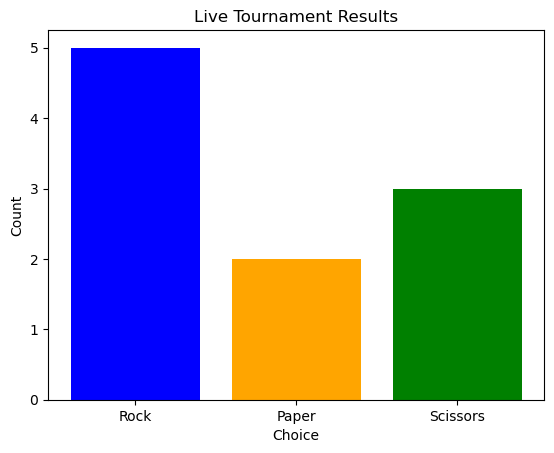


Final Standings:
Peter - Final Score: 101
Zoe - Final Score: 99
Jane - Final Score: 95
Jim - Final Score: 90

Winner: Peter with 101 points!


In [210]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Simulated example for live visualization
results = {"Rock": 0, "Paper": 0, "Scissors": 0}

# Example loop for 10 rounds
for i in range(10):
    # Simulate a random outcome (replace this with actual logic)
    import random
    choice = random.choice(["Rock", "Paper", "Scissors"])
    results[choice] += 1

    # Clear previous output
    clear_output(wait=True)

    # Display updated results
    print(f"Round {i+1}: Current stats")
    for key, value in results.items():
        print(f"{key}: {value}")

# Mostrar progreso cada 10 rondas
    if (aRound + 1) % 10 == 0 or aRound == num_rounds - 1:
        clear_output(wait=True)
        print(f"Round {aRound + 1}: Current stats")
        for player in society:
            print(f"{player['name']} - Score: {player['score']} - Last Strategy: {player['strategy']}")
    
    # Dynamic plot
    plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green'])
    plt.title("Live Tournament Results")
    plt.xlabel("Choice")
    plt.ylabel("Count")
    plt.show()
    
# Determinar ganadores
society.sort(key=lambda x: x['score'], reverse=True)
print("\nFinal Standings:")
for player in society:
    print(f"{player['name']} - Final Score: {player['score']}")

# Ganador absoluto
winner = society[0]
print(f"\nWinner: {winner['name']} with {winner['score']} points!")

### Exercise 2
<div class="alert-success">

How would you implement this game for 10 players, and get the results?
    
</div>
<img src="https://i.imgur.com/DE5mjs4.jpg"/>


In [213]:
strategies=['Rock','Paper','Scissors','Lizard','Spock']

In [215]:
payoff={('Rock','Paper'):(0,1),
        ('Paper','Rock'):(1,0),
        ('Rock','Scissors'):(1,0),
        ('Scissors','Rock'):(0,1),
        ('Paper','Scissors'):(0,1),
        ('Scissors','Paper'):(1,0),
        ('Rock','Rock'):(0,0),
        ('Paper','Paper'):(0,0),
        ('Scissors','Scissors'):(0,0),
        
        ('Lizard','Paper'):(1,0),
        ('Paper','Lizard'):(0,1),
        ('Rock','Lizard'):(1,0),
        ('Lizard','Rock'):(0,1),
        ('Lizard','Scissors'):(0,1),
        ('Scissors','Lizard'):(1,0),
        ('Lizard','Spock'):(1,0),
        ('Spock','Lizard'):(0,1),
        ('Lizard','Lizard'):(0,0),

        ('Spock','Scissors'):(1,0),
        ('Scissors','Spock'):(0,1),
        ('Spock','Rock'):(1,0),
        ('Rock','Spock'):(0,1),
        ('Spock','Paper'):(0,1),
        ('Paper','Spock'):(1,0),
        ('Spock','Spock'):(0,0)}

In [217]:
Players=[{'name':'John','score':0,'strategy':None},
         {'name':'Mary','score':0,'strategy':None}]

In [219]:
from random import choice

#simplest strategy: choose randomly
choice(strategies);

In [221]:
# update agents situation
Players[0]['score']+=result[0]
Players[1]['score']+=result[1]

In [223]:
# current agent situation
Players

[{'name': 'John', 'score': 0, 'strategy': None},
 {'name': 'Mary', 'score': 0, 'strategy': None}]

In [225]:
import pandas as pd

socialResults=pd.DataFrame((Players[0], Players[1]))
socialResults

,name,score,strategy
0,John,0,None
1,Mary,0,None


In [227]:
winnerScore=socialResults.score.max()

#social outcome
socialResults[socialResults.score==winnerScore]

,name,score,strategy
0,John,0,None
1,Mary,0,None


In [229]:
# names of players
names=['Jim','Jane','Peter','Zoe']

In [231]:
# setting up players
society=[{'name':n,'score':0,'strategy':None} for n in names]

In [233]:
# each player a dict:
society

[{'name': 'Jim', 'score': 0, 'strategy': None},
 {'name': 'Jane', 'score': 0, 'strategy': None},
 {'name': 'Peter', 'score': 0, 'strategy': None},
 {'name': 'Zoe', 'score': 0, 'strategy': None}]

In [235]:
import itertools

# pair is a tuple of dicts
for pair in itertools.combinations(society,2):
    print(pair)

({'name': 'Jim', 'score': 0, 'strategy': None}, {'name': 'Jane', 'score': 0, 'strategy': None})
({'name': 'Jim', 'score': 0, 'strategy': None}, {'name': 'Peter', 'score': 0, 'strategy': None})
({'name': 'Jim', 'score': 0, 'strategy': None}, {'name': 'Zoe', 'score': 0, 'strategy': None})
({'name': 'Jane', 'score': 0, 'strategy': None}, {'name': 'Peter', 'score': 0, 'strategy': None})
({'name': 'Jane', 'score': 0, 'strategy': None}, {'name': 'Zoe', 'score': 0, 'strategy': None})
({'name': 'Peter', 'score': 0, 'strategy': None}, {'name': 'Zoe', 'score': 0, 'strategy': None})


In [237]:
import itertools

# each dict
for player1,player2 in itertools.combinations(society,2):
    print(player1,player2)

{'name': 'Jim', 'score': 0, 'strategy': None} {'name': 'Jane', 'score': 0, 'strategy': None}
{'name': 'Jim', 'score': 0, 'strategy': None} {'name': 'Peter', 'score': 0, 'strategy': None}
{'name': 'Jim', 'score': 0, 'strategy': None} {'name': 'Zoe', 'score': 0, 'strategy': None}
{'name': 'Jane', 'score': 0, 'strategy': None} {'name': 'Peter', 'score': 0, 'strategy': None}
{'name': 'Jane', 'score': 0, 'strategy': None} {'name': 'Zoe', 'score': 0, 'strategy': None}
{'name': 'Peter', 'score': 0, 'strategy': None} {'name': 'Zoe', 'score': 0, 'strategy': None}


In [239]:
# resetting society
society=[{'name':n,'score':0,'strategy':None} for n in names]

# several rounds
for aRound in range(100):
    
    # en each round:
    for player1,player2 in itertools.combinations(society,2):
        # each chooses strategy
        player1['strategy']=choice(strategies)
        
        player2['strategy']=choice(strategies)
        
        # result from strategy chosen
        result=payoff[player1['strategy'],player2['strategy']]
            
        # update scores
        player1['score']+=result[0]
        player2['score']+=result[1]
    

In [241]:
# final situation
society

[{'name': 'Jim', 'score': 124, 'strategy': 'Spock'},
 {'name': 'Jane', 'score': 126, 'strategy': 'Spock'},
 {'name': 'Peter', 'score': 112, 'strategy': 'Paper'},
 {'name': 'Zoe', 'score': 111, 'strategy': 'Paper'}]

In [243]:
# as a data frame
socialResults=pd.DataFrame(society)
socialResults

,name,score,strategy
0,Jim,124,Spock
1,Jane,126,Spock
2,Peter,112,Paper
3,Zoe,111,Paper


In [245]:
winnerScore=socialResults.score.max()

#social outcome
socialResults[socialResults.score==winnerScore]

,name,score,strategy
1,Jane,126,Spock


# Abstraction of agents

Let's see some abstraction known 'OOP', which stands for Objetc-Oriented Programming.

* This is the creation of an agent object and its methods: Creamos el objeo deel jugador que tendrá algunos mótdos sobre la capacidad de crarse y d enacer. ESte tenddrá un nombre y un scoree. Esta variablee nombree le pertenece a sete mismo y el socree también. Hay un objeto ue refiere a aumentar score.  

In [248]:
class Player:    # object class

    def __init__(self,name,score=0): # create the object (self) for the class
        self.name=name               # with some variables
        self.score=score

    def increase_score(self,value):  # metho for object class
        self.score+=value

Once created, you can give origin to instances of the object: Con esto creaas dos agentes. El score es 0, es un default.

In [251]:
Mary=Player("Mary")
John=Player("John")

Let's use some previous code: Estas serían las estrategias desde un código previo

In [254]:
John_strategy=choice(strategies)
Mary_strategy=choice(strategies)

John_PayOff,Mary_PayOff=payoff[John_strategy,Mary_strategy]
John_PayOff,Mary_PayOff

(1, 0)

We use those values to change the instaces' variables, as defined in the object class:

In [257]:
John.increase_score(John_PayOff)
Mary.increase_score(Mary_PayOff)

The instances did update the score: Estamos codificando, entrando al Python

In [260]:
John.score, Mary.score

(1, 0)

* A new class that inherists previous class: (Programación antigua)

In [263]:
class PlayerBetter(Player):
    def __init__(self,name,score=0):
        Player.__init__(self,name,score=0) #Ya existe el player, podemos crear una clase que sea mejor (better player)
        self.strategy=None

    def increase_score(self,value):
        self.score+=value

    def get_strategy(self): #De esto, se elige uno.
        from random import choice
        strategies=['Rock','Paper','Scissors']
        self.strategy=choice(strategies)
        return self.strategy

We can use the new class:

In [266]:
Mary=PlayerBetter("Mary")
John=PlayerBetter("John")

# No vamos a ncesitar esto porque el payoff refiere a que cada uno tendrá su estrategia.
# John_strategy=choice(strategies)
# Mary_strategy=choice(strategies)

John_PayOff,Mary_PayOff=payoff[John.get_strategy(),Mary.get_strategy()]
John.increase_score(John_PayOff)
Mary.increase_score(Mary_PayOff)
##
John.score, Mary.score

(1, 0)

The new class saves the current strategy:

In [269]:
print(John.strategy, Mary.strategy) 

Rock Scissors


We can use the new class repeatedly: Lo hacemos de manera repetida

In [272]:
Mary=PlayerBetter("Mary")
John=PlayerBetter("John")

for i in range(10):
    John_PayOff,Mary_PayOff=payoff[John.get_strategy(),Mary.get_strategy()]
    John.increase_score(John_PayOff)
    Mary.increase_score(Mary_PayOff)
    # see current result
    print('round:',i+1)
    print(John.score, Mary.score)
    print(John.strategy, Mary.strategy)

round: 1
0 1
Scissors Rock
round: 2
0 2
Paper Scissors
round: 3
1 2
Scissors Paper
round: 4
2 2
Rock Scissors
round: 5
3 2
Rock Scissors
round: 6
3 3
Scissors Rock
round: 7
3 3
Rock Rock
round: 8
3 4
Rock Paper
round: 9
3 4
Scissors Scissors
round: 10
4 4
Scissors Paper


<div class="alert alert-danger">
  <strong>CHALLENGE!</strong>
   <br> * Create classes that allows you to have several players play 100 rounds.
   <br> * Save the scores.
   <br> * Declare a winner
</div>

In [275]:
strategies=['Rock','Paper','Scissors']

## Rules

The rules tell you that according to a strategy followed, players get a pay-off:

In [278]:
payoff={('Rock','Paper'):(0,1),
        ('Paper','Rock'):(1,0),
        ('Rock','Scissors'):(1,0),
        ('Scissors','Rock'):(0,1),
        ('Paper','Scissors'):(0,1),
        ('Scissors','Paper'):(1,0),
        ('Rock','Rock'):(0,0),
        ('Paper','Paper'):(0,0),
        ('Scissors','Scissors'):(0,0)}

## Creating and setting up agents:

Players have a name, but have no score, and no strategy yet.

In [281]:
Players=[{'name':'Carlos M','score':0,'strategy':None},
         {'name':'Bruno R','score':0,'strategy':None},
         {'name':'Alfredo A','score':0,'strategy':None},
         {'name':'Romina L','score':0,'strategy':None},
        {'name':'Mori','score':0,'strategy':None},
        {'name':'Sergio T','score':0,'strategy':None},
        {'name':'Diego T','score':0,'strategy':None},
        {'name':'Elizabeth G','score':0,'strategy':None},
        {'name':'Joaquín PUCP','score':0,'strategy':None},
        {'name':'Juan de Dios','score':0,'strategy':None},
        {'name':'Hiroshi E','score':0,'strategy':None},
        {'name':'Bruno U','score':0,'strategy':None},
        {'name':'Jovverson','score':0,'strategy':None},
        {'name':'Solange N','score':0,'strategy':None},
        {'name':'Lara P','score':0,'strategy':None},
        {'name':'Fernanda T','score':0,'strategy':None},
        {'name':'Lucciana R','score':0,'strategy':None},
        {'name':'Micaela C','score':0,'strategy':None}]

## Decision making process

This is the process to choose an strategy: 
Esto podría tener un montón de líneas, pero se eligen al azar. Esta es la mejor estrategia (el azar) en esta simulación de elegir piedra, papel o tigeras. Sin embargo, podríamos asignar las probabilidades para ganar sobre cada situación. 

In [284]:
from random import choice

#simplest strategy: choose randomly
choice(strategies);

## The moment of truth

* ### agent decide strategy

In [288]:
Players[0]['strategy']=choice(strategies)
Players[1]['strategy']=choice(strategies)

* ### decisions made

In [291]:
Players[0]['strategy'],Players[1]['strategy']

('Scissors', 'Rock')

In [293]:
# social result of individual decision
result = payoff[Players[0]['strategy'],Players[1]['strategy']]
result

(0, 1)

Este es el jugador qquien gana

* ### agent benefits/suffers from decision made

In [297]:
# update agents situation
Players[0]['score']+=result[0]
Players[1]['score']+=result[1]

In [299]:
# current agent situation
Players

[{'name': 'Carlos M', 'score': 0, 'strategy': 'Scissors'},
 {'name': 'Bruno R', 'score': 1, 'strategy': 'Rock'},
 {'name': 'Alfredo A', 'score': 0, 'strategy': None},
 {'name': 'Romina L', 'score': 0, 'strategy': None},
 {'name': 'Mori', 'score': 0, 'strategy': None},
 {'name': 'Sergio T', 'score': 0, 'strategy': None},
 {'name': 'Diego T', 'score': 0, 'strategy': None},
 {'name': 'Elizabeth G', 'score': 0, 'strategy': None},
 {'name': 'Joaquín PUCP', 'score': 0, 'strategy': None},
 {'name': 'Juan de Dios', 'score': 0, 'strategy': None},
 {'name': 'Hiroshi E', 'score': 0, 'strategy': None},
 {'name': 'Bruno U', 'score': 0, 'strategy': None},
 {'name': 'Jovverson', 'score': 0, 'strategy': None},
 {'name': 'Solange N', 'score': 0, 'strategy': None},
 {'name': 'Lara P', 'score': 0, 'strategy': None},
 {'name': 'Fernanda T', 'score': 0, 'strategy': None},
 {'name': 'Lucciana R', 'score': 0, 'strategy': None},
 {'name': 'Micaela C', 'score': 0, 'strategy': None}]

Situación de elos agentes. Es la última decisión de cada uno. Puedes guardar los recuerdos y las veces que ganaste. 

* ### social outcome

In [303]:
import pandas as pd

socialResults=pd.DataFrame((Players[0], Players[1]))
socialResults

,name,score,strategy
0,Carlos M,0,Scissors
1,Bruno R,1,Rock


Es otra forma de ver los resultados.

In [306]:
winnerScore=socialResults.score.max()

#social outcome
socialResults[socialResults.score==winnerScore]

,name,score,strategy
1,Bruno R,1,Rock


# More players

In [310]:
# names of players
names=['Carlos M','Bruno R','Alfredo A','Romina L', 'Mori', 'Sergio T', 'Diego T', 'Elizabeth G', 'Joaquín PUCP', ' Juan de Dios', 
       'Hiroshi E', 'Bruno U', 'Jovverson', 'Lara P', 'Fernanda T', 'Lucciana R', 'Micaela C']

Con esto creamos una sociedad:

In [313]:
# setting up players
society=[{'name':n,'score':0,'strategy':None} for n in names]

In [315]:
# each player a dict:
society

[{'name': 'Carlos M', 'score': 0, 'strategy': None},
 {'name': 'Bruno R', 'score': 0, 'strategy': None},
 {'name': 'Alfredo A', 'score': 0, 'strategy': None},
 {'name': 'Romina L', 'score': 0, 'strategy': None},
 {'name': 'Mori', 'score': 0, 'strategy': None},
 {'name': 'Sergio T', 'score': 0, 'strategy': None},
 {'name': 'Diego T', 'score': 0, 'strategy': None},
 {'name': 'Elizabeth G', 'score': 0, 'strategy': None},
 {'name': 'Joaquín PUCP', 'score': 0, 'strategy': None},
 {'name': ' Juan de Dios', 'score': 0, 'strategy': None},
 {'name': 'Hiroshi E', 'score': 0, 'strategy': None},
 {'name': 'Bruno U', 'score': 0, 'strategy': None},
 {'name': 'Jovverson', 'score': 0, 'strategy': None},
 {'name': 'Lara P', 'score': 0, 'strategy': None},
 {'name': 'Fernanda T', 'score': 0, 'strategy': None},
 {'name': 'Lucciana R', 'score': 0, 'strategy': None},
 {'name': 'Micaela C', 'score': 0, 'strategy': None}]

Cada quien con score

In [318]:
import itertools

# pair is a tuple of dicts
for pair in itertools.combinations(society,2):
    print(pair)

({'name': 'Carlos M', 'score': 0, 'strategy': None}, {'name': 'Bruno R', 'score': 0, 'strategy': None})
({'name': 'Carlos M', 'score': 0, 'strategy': None}, {'name': 'Alfredo A', 'score': 0, 'strategy': None})
({'name': 'Carlos M', 'score': 0, 'strategy': None}, {'name': 'Romina L', 'score': 0, 'strategy': None})
({'name': 'Carlos M', 'score': 0, 'strategy': None}, {'name': 'Mori', 'score': 0, 'strategy': None})
({'name': 'Carlos M', 'score': 0, 'strategy': None}, {'name': 'Sergio T', 'score': 0, 'strategy': None})
({'name': 'Carlos M', 'score': 0, 'strategy': None}, {'name': 'Diego T', 'score': 0, 'strategy': None})
({'name': 'Carlos M', 'score': 0, 'strategy': None}, {'name': 'Elizabeth G', 'score': 0, 'strategy': None})
({'name': 'Carlos M', 'score': 0, 'strategy': None}, {'name': 'Joaquín PUCP', 'score': 0, 'strategy': None})
({'name': 'Carlos M', 'score': 0, 'strategy': None}, {'name': ' Juan de Dios', 'score': 0, 'strategy': None})
({'name': 'Carlos M', 'score': 0, 'strategy': No

Esto son todos los pares que habrán, jugarán todos contra todos.

In [321]:
import itertools

# each dict
for player1,player2 in itertools.combinations(society,2):
    print(player1,player2)

{'name': 'Carlos M', 'score': 0, 'strategy': None} {'name': 'Bruno R', 'score': 0, 'strategy': None}
{'name': 'Carlos M', 'score': 0, 'strategy': None} {'name': 'Alfredo A', 'score': 0, 'strategy': None}
{'name': 'Carlos M', 'score': 0, 'strategy': None} {'name': 'Romina L', 'score': 0, 'strategy': None}
{'name': 'Carlos M', 'score': 0, 'strategy': None} {'name': 'Mori', 'score': 0, 'strategy': None}
{'name': 'Carlos M', 'score': 0, 'strategy': None} {'name': 'Sergio T', 'score': 0, 'strategy': None}
{'name': 'Carlos M', 'score': 0, 'strategy': None} {'name': 'Diego T', 'score': 0, 'strategy': None}
{'name': 'Carlos M', 'score': 0, 'strategy': None} {'name': 'Elizabeth G', 'score': 0, 'strategy': None}
{'name': 'Carlos M', 'score': 0, 'strategy': None} {'name': 'Joaquín PUCP', 'score': 0, 'strategy': None}
{'name': 'Carlos M', 'score': 0, 'strategy': None} {'name': ' Juan de Dios', 'score': 0, 'strategy': None}
{'name': 'Carlos M', 'score': 0, 'strategy': None} {'name': 'Hiroshi E', 's

In [323]:
# resetting society
society=[{'name':n,'score':0,'strategy':None} for n in names]

# several rounds
for aRound in range(100):
    
    # en each round:
    for player1,player2 in itertools.combinations(society,2):
        # each chooses strategy
        player1['strategy']=choice(strategies)
        
        player2['strategy']=choice(strategies)
        
        # result from strategy chosen
        result=payoff[player1['strategy'],player2['strategy']]
            
        # update scores
        player1['score']+=result[0]
        player2['score']+=result[1]
    

Hago que jueguen 100 veces.

In [326]:
# final situation
society

[{'name': 'Carlos M', 'score': 513, 'strategy': 'Rock'},
 {'name': 'Bruno R', 'score': 535, 'strategy': 'Paper'},
 {'name': 'Alfredo A', 'score': 507, 'strategy': 'Scissors'},
 {'name': 'Romina L', 'score': 517, 'strategy': 'Rock'},
 {'name': 'Mori', 'score': 537, 'strategy': 'Scissors'},
 {'name': 'Sergio T', 'score': 547, 'strategy': 'Scissors'},
 {'name': 'Diego T', 'score': 527, 'strategy': 'Scissors'},
 {'name': 'Elizabeth G', 'score': 528, 'strategy': 'Scissors'},
 {'name': 'Joaquín PUCP', 'score': 578, 'strategy': 'Scissors'},
 {'name': ' Juan de Dios', 'score': 538, 'strategy': 'Scissors'},
 {'name': 'Hiroshi E', 'score': 525, 'strategy': 'Rock'},
 {'name': 'Bruno U', 'score': 531, 'strategy': 'Rock'},
 {'name': 'Jovverson', 'score': 519, 'strategy': 'Scissors'},
 {'name': 'Lara P', 'score': 523, 'strategy': 'Scissors'},
 {'name': 'Fernanda T', 'score': 525, 'strategy': 'Rock'},
 {'name': 'Lucciana R', 'score': 533, 'strategy': 'Paper'},
 {'name': 'Micaela C', 'score': 536, 'st

Resultado final y lo mandaamos al df

In [329]:
# as a data frame
socialResults=pd.DataFrame(society)
socialResults

,name,score,strategy
0,Carlos M,513,Rock
1,Bruno R,535,Paper
2,Alfredo A,507,Scissors
3,Romina L,517,Rock
4,Mori,537,Scissors
5,Sergio T,547,Scissors
6,Diego T,527,Scissors
7,Elizabeth G,528,Scissors
8,Joaquín PUCP,578,Scissors
9,Juan de Dios,538,Scissors


Quién ganó y qué se hizo más.

In [332]:
winnerScore=socialResults.score.max()

#social outcome
socialResults[socialResults.score==winnerScore]

,name,score,strategy
8,Joaquín PUCP,578,Scissors
